In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import distance, dendrogram, linkage, set_link_color_palette
from sklearn.preprocessing import MinMaxScaler

In [2]:
dict_all = pd.read_excel("./data/data.xlsx", header=None, sheet_name=None)
dict_selected_descriptors = pd.read_excel("./data/data_selected_descriptors.xlsx", header=None, sheet_name=None)
df_labels = pd.read_excel("./data/labels.xlsx",sheet_name=None)
# bar plot bar colors per class
label_colors = {0: 'r', 1: 'g', 2: 'b', 3: 'm', 4: 'c', 5: 'y'}
markers_list = ['*','o','^','D','s']


In [3]:
def plot_dendro_with_bar(ax, Z, num_of_original_classes,N,df_labels, name,fig_label ):
    
    #Set the color threshold
    # ZERO INDEXING , get the "num_of_original_classes" 's largest distance from linkage
    col_threshold = Z[-num_of_original_classes + 1, 2]
    col_list = ["#B2BEB5", "#A9A9A9", "#808080","#899499"]
    set_link_color_palette(col_list[0:num_of_original_classes]) # differen colors links 
    dend = dendrogram(Z, 
                    no_labels = True, 
                    color_threshold = col_threshold
                    )
    
    # Extract the colors for each class matching the dendrogram leaves   
    color = [df_labels.iloc[k]['color'] for k in dend['leaves']]
    
    # get the max distance from linkages
    max_distance = Z[-1, 2]
    
    #multiply by a factor of the max 
    prop = max_distance * 0.1
    
    #This will be the start of the bar graph 
    bottom = - prop
    
    X = np.arange(N) * 10
    Y= np.ones(N) * (prop)
        
    plt.bar(X, 
            Y, 
            bottom = bottom, 
            width = 10,
            color = color, 
            edgecolor = 'none')
    
    for key, spine in ax.spines.items():
        spine.set_visible(False)
        
    plt.gca().set_ylim((bottom, None))
    
    counts = df_labels.groupby(['abb']).count()
    label_name_num_map = dict(zip(df_labels.abb.unique(), df_labels.color.unique()))       
    labels = list(label_name_num_map.keys())
    handles = [plt.Rectangle((0,0),1,1, color=label_name_num_map[label]) for label in labels]

    labels_with_counts=[]
    for label in labels :
        labels_with_counts.append(str(label) + ' (' + str(counts.loc[label]['color']) + ')')
    plt.legend(handles, labels_with_counts, bbox_to_anchor =(0.7, 0.9), frameon=False,fontsize='10')
    plt.text(0.1, 1,fig_label, ha='center', va='center', size=15 , weight='bold', transform = ax.transAxes)
    plt.title(name,fontdict={'fontsize': 14, 'color': 'blue', 'fontweight' : 'bold'})

### Dendrograms for Morphometrics, Distance matrix and Vectors

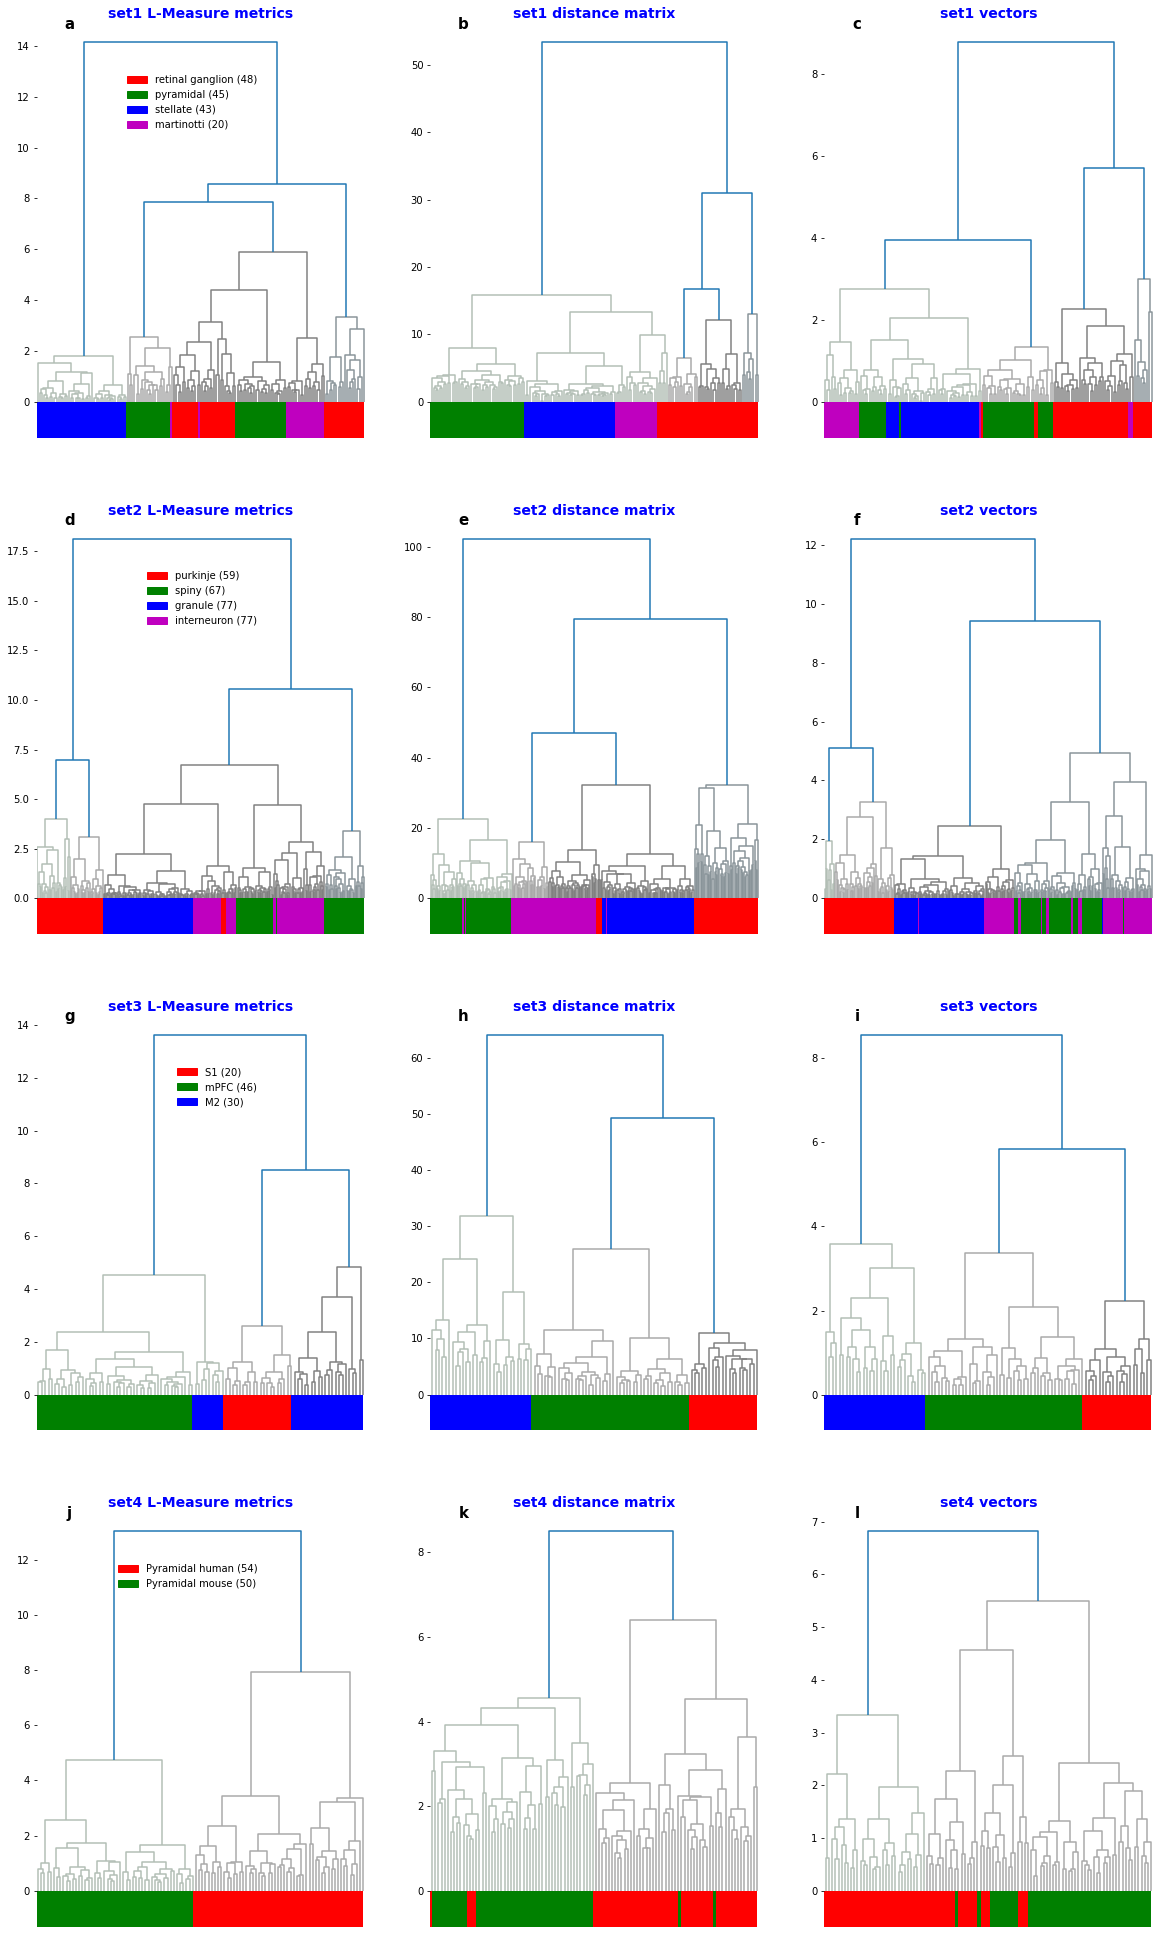

In [4]:
fig = plt.figure(figsize=(20,35))
grid = plt.GridSpec(4, 3, wspace=0.2, hspace=0.2)
i=0


fig_label = ord('a')
for key, val in dict_all.items():
    # get the labels once for each set
    if i % 3 == 0 :
        labels = df_labels[key[0:4]]
        labels['color'] = labels.apply(lambda row: label_colors[row._class] , axis=1)
        num_of_original_classes = len(labels._class.unique())
        N = len(labels)
    
    if key.find('distance') != -1 :
        condensed_distance_mtx = squareform(val.values)
    else :
        # Only scale for vectors
        scaler = MinMaxScaler()
        X = scaler.fit_transform(val)
        condensed_distance_mtx = distance.pdist(X)
           
    
    Z = linkage(condensed_distance_mtx, method='ward',optimal_ordering = True)
    name = key
    ax = plt.subplot(grid[int(i / 3), i % 3])
    plot_dendro_with_bar(ax, Z,num_of_original_classes, N, labels, name, chr(fig_label))
    if i % 3 != 0 :
        ax.get_legend().remove()
    i += 1
    fig_label += 1
    
   

### Representative dendrograms for Individual descriptors

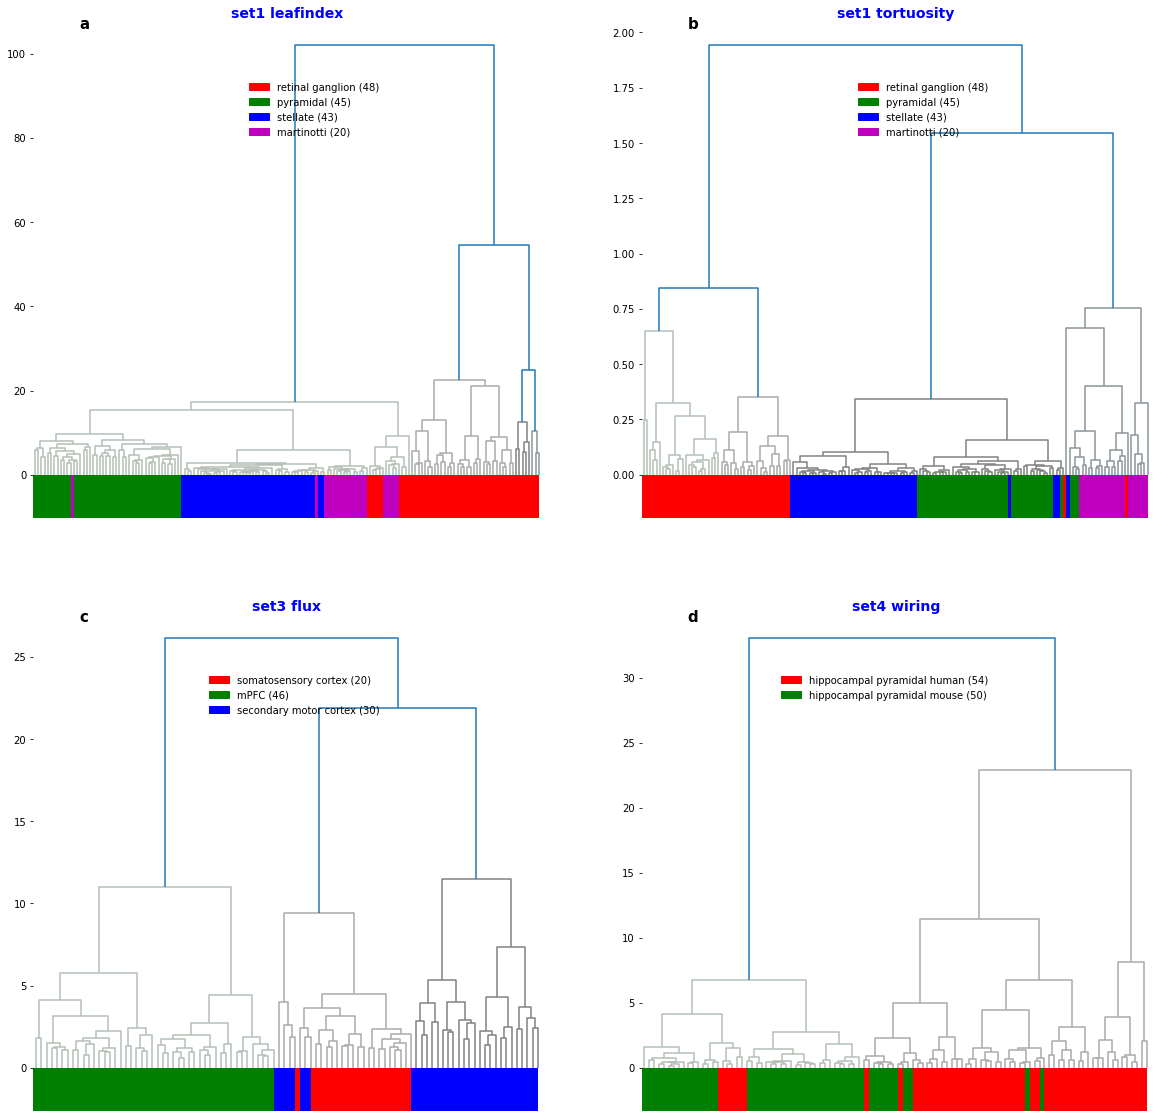

In [8]:
fig = plt.figure(figsize=(20,20))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)
i=0

fig_label = ord('a')

for key, val in dict_selected_descriptors.items():
        # get the labels once for each set
        labels = df_labels[key[0:4]]
        labels['color'] = labels.apply(lambda row: label_colors[row._class] , axis=1)
        num_of_original_classes = len(labels._class.unique())
        N = len(labels)
        
        condensed_distance_mtx = squareform(val.values)
        Z = linkage(condensed_distance_mtx, method='ward',optimal_ordering = True)
        name = key
        ax = plt.subplot(grid[int(i / 2), i % 2])
        plot_dendro_with_bar(ax, Z,num_of_original_classes, N, labels, name,chr(fig_label))
        i += 1
        fig_label += 1